In [50]:
import sys
# if not sys.warnoptions:
import warnings
warnings.simplefilter("ignore")

!pip install hvplot
import hvplot
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [72]:
# data set prepare
data = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/train.csv')
data_test = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')

In [52]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [53]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.0,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.0,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,36.697189,810.515866,9.296464,2.943790,1.0,742.293744,2.731641,65.805984,2.733454,2.075249,2.718948,6481.290118,14394.726201,2.657298,15.233908,3.153218,2.696283,80.0,0.764279,11.212149,2.792384,2.773345,7.004533,4.223935,2.143246,4.150499
std,9.075448,405.943336,8.150026,1.012855,0.0,426.965196,1.081341,20.186842,0.710075,1.117731,1.093984,4719.804196,7056.403020,2.462506,3.669620,0.360361,1.073207,0.0,0.830844,7.806784,1.308029,0.702172,6.124760,3.608279,3.203527,3.579410
min,18.000000,103.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.500000,2.000000,2.000000,1.0,369.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2906.500000,8245.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,805.000000,7.000000,3.000000,1.0,740.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4900.000000,14394.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,1.0,1116.500000,4.000000,83.000000,3.000000,3.000000,4.000000,7989.500000,20435.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,1470.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [54]:
# Detect features have a unique value
features_to_remove = []
for column in data.columns:
    if data[column].nunique() == 1:
        print(f"{column}: Number of unique values {data[column].nunique()}")
        print("-----------------------------------------")
        features_to_remove.append(column)
features_to_remove

EmployeeCount: Number of unique values 1
-----------------------------------------
Over18: Number of unique values 1
-----------------------------------------
StandardHours: Number of unique values 1
-----------------------------------------


['EmployeeCount', 'Over18', 'StandardHours']

# 2. Exploratory Data Analysis

## 2.1 Data Cleaning 

Drop `EmployeeCount`,`EmployeeNumber`, `Over18` and `StandardHours`

## 2.2 Categorical Features Analysis

In [55]:
# find low_dim features
cat_col_low_dim = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 10:
        cat_col_low_dim.append(column)
cat_col_low_dim.remove('Attrition')
for x in features_to_remove:
    if x in cat_col_low_dim:
        cat_col_low_dim.remove(x)
print(len(cat_col_low_dim))
for feature in cat_col_low_dim:
    print(f"{feature} : {data[feature].unique()}")
    print(data[feature].value_counts())
    print("-----------------------------------------")

7
BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Travel_Rarely        788
Travel_Frequently    194
Non-Travel           121
Name: BusinessTravel, dtype: int64
-----------------------------------------
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    716
Sales                     339
Human Resources            48
Name: Department, dtype: int64
-----------------------------------------
EducationField : ['Other' 'Marketing' 'Medical' 'Technical Degree' 'Life Sciences'
 'Human Resources']
Life Sciences       466
Medical             334
Marketing           121
Technical Degree     97
Other                63
Human Resources      22
Name: EducationField, dtype: int64
-----------------------------------------
Gender : ['Female' 'Male']
Male      675
Female    428
Name: Gender, dtype: int64
-----------------------------------------
JobRole : ['Laboratory Technician' 'Sales Representative'
 'Healthcare Representative' 'Sales Executi

In [56]:
cat_col_low_dim

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

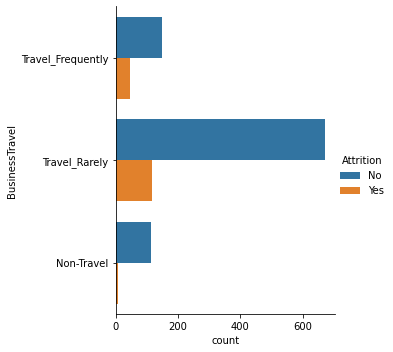

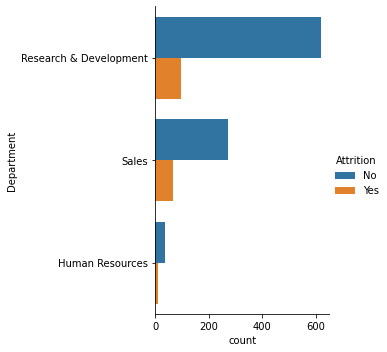

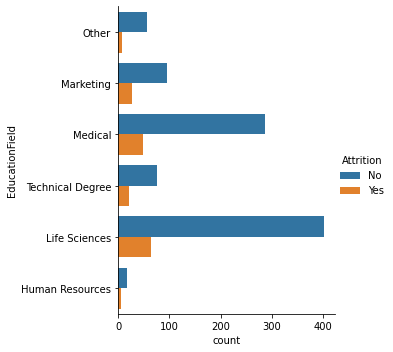

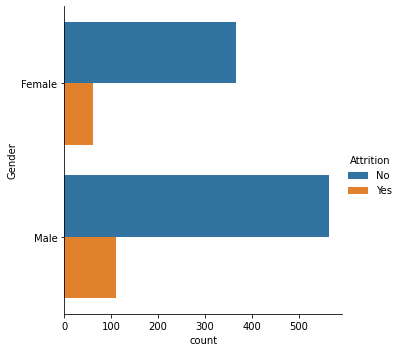

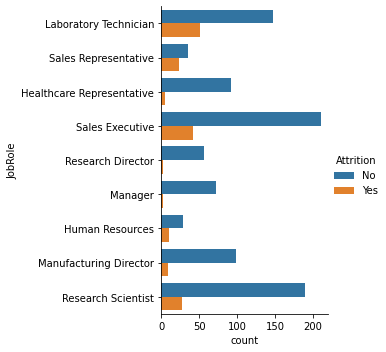

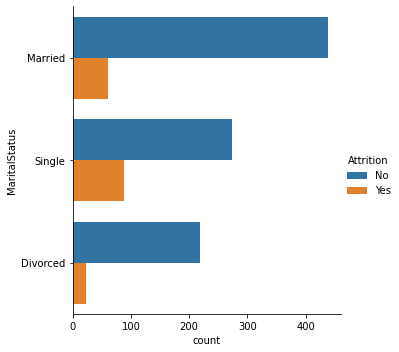

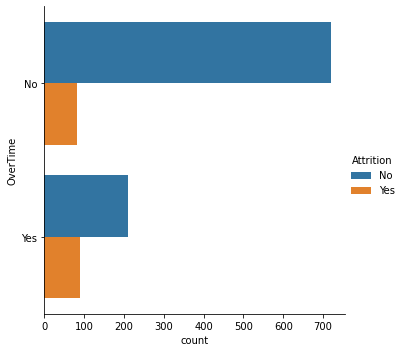

In [57]:
for y in cat_col_low_dim:
    sns.catplot(data=data, kind="count", y=y, hue="Attrition",height=5)

## 2.3 Numerical Features Analysis

In [58]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() < 10:
#         print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
#         print("====================================")
# disc_col.remove('Attrition')
disc_col

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

<AxesSubplot:>

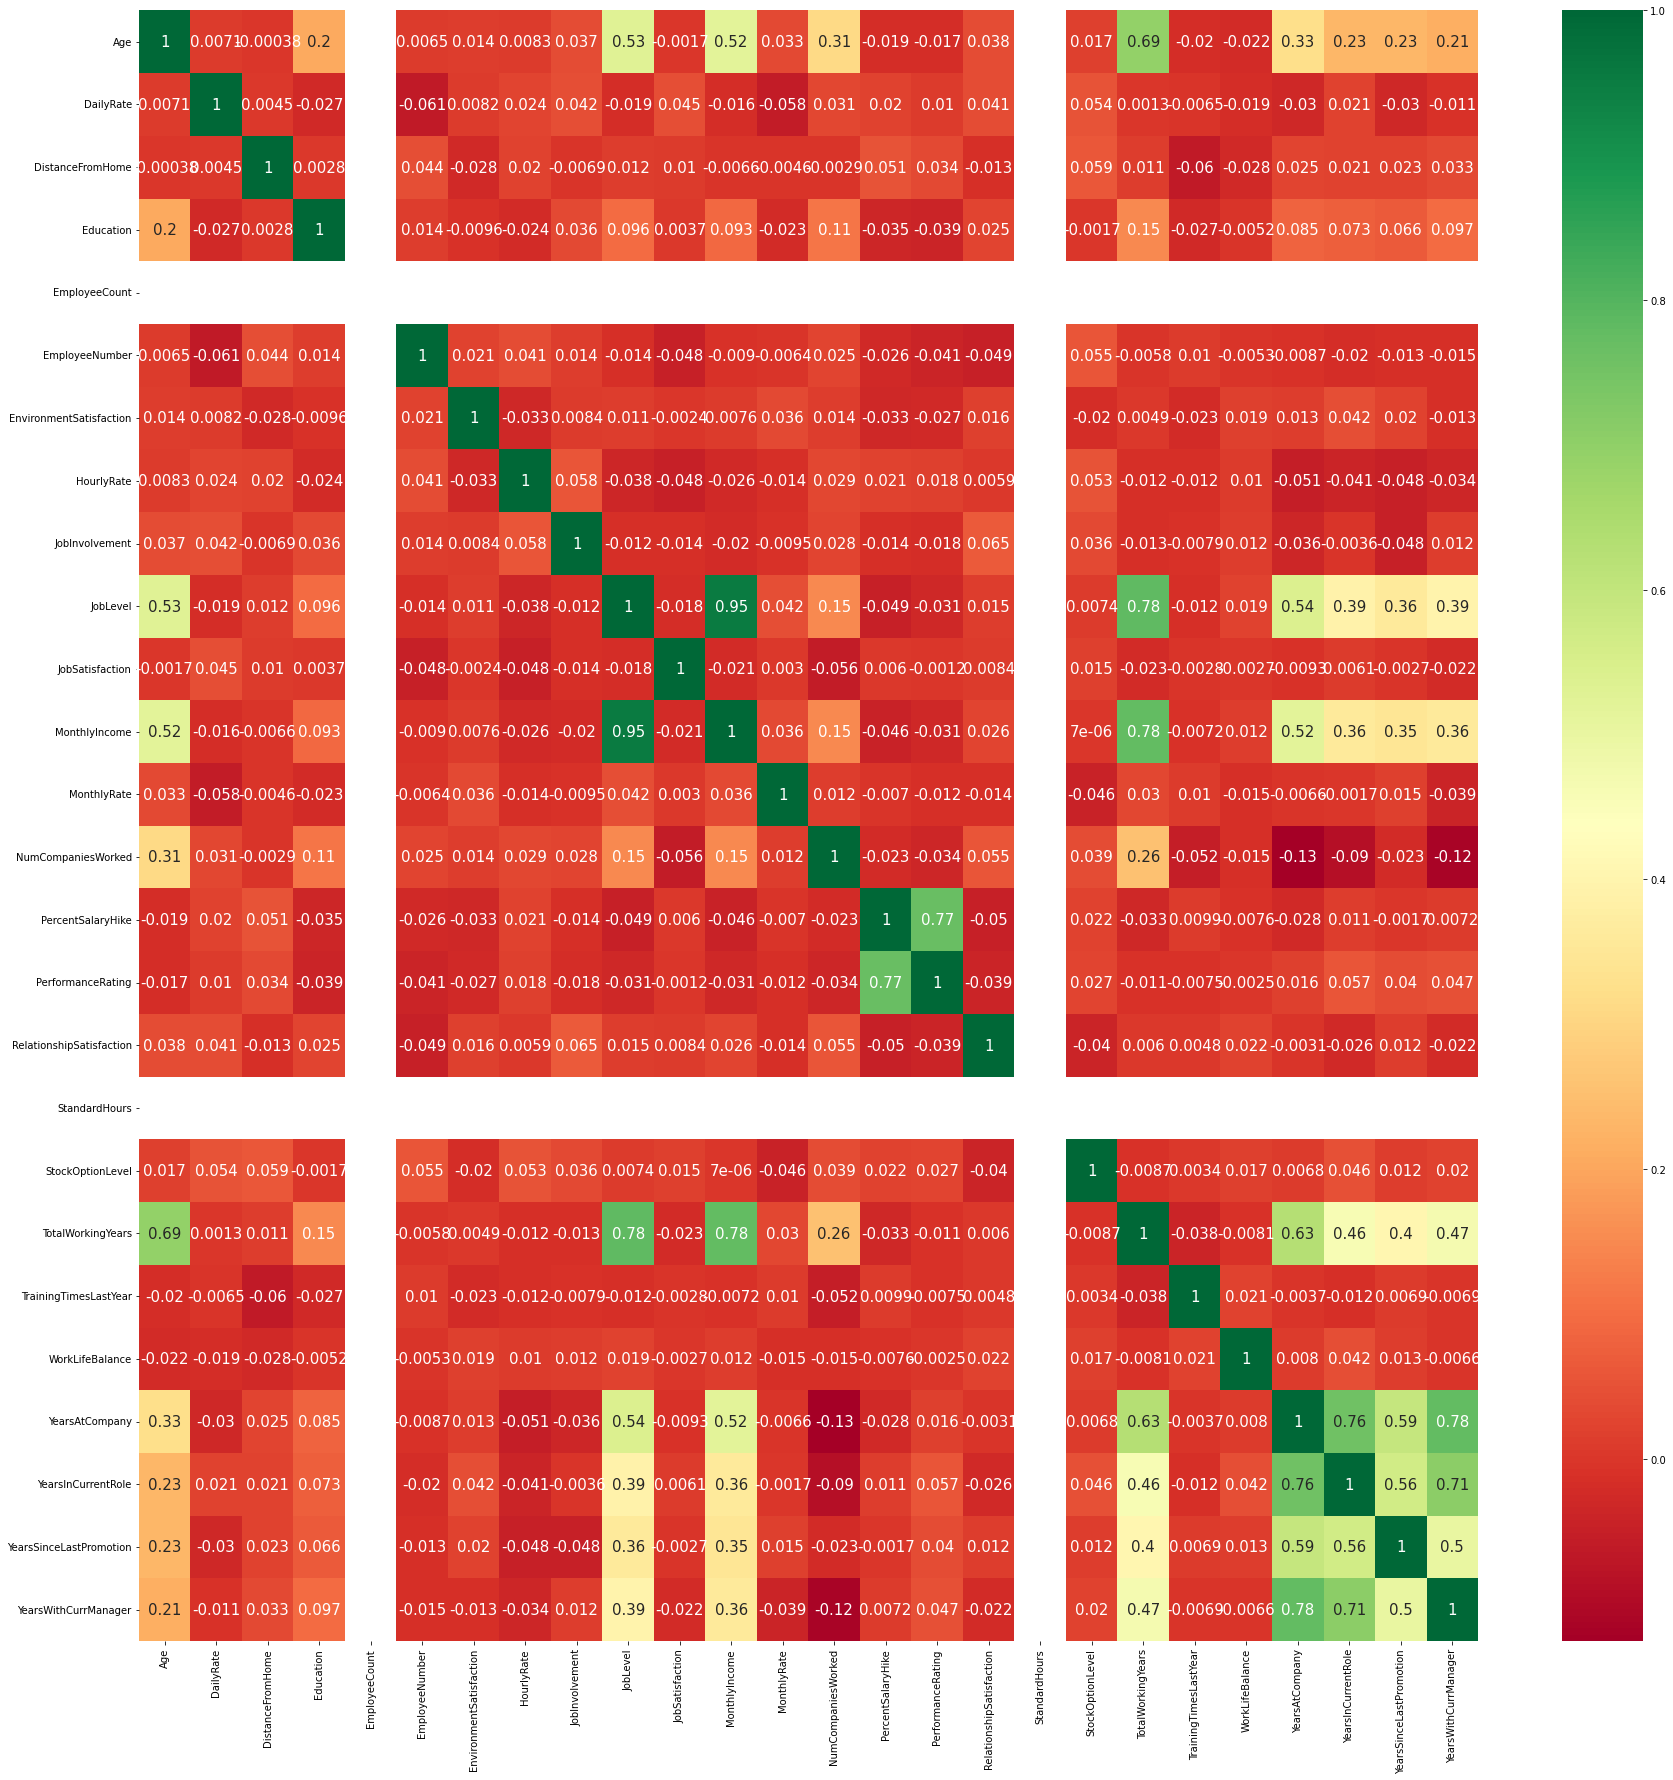

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [60]:
data.hvplot.hist(y=disc_col[0], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [61]:
data.hvplot.hist(y=disc_col[2], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [62]:
data.hvplot.hist(y=disc_col[3], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

In [63]:
data.hvplot.hist(y=disc_col[4], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [64]:
data.hvplot.hist(y=disc_col[5], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [65]:
data.hvplot.hist(y=disc_col[6], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PerformanceRating]   (PerformanceRating_count)

In [66]:
data.hvplot.hist(y=disc_col[7], by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

# 3. Data Processing


In [73]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess(df,attr=1):
    df = df.copy()
    
    # Features to drop 
    df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
    
    # Binary-encode
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
    
    # Ordinal-encode
    df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
    
    # One-hot encoding
    for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
        df = onehot_encode(df, column=column)
    
    if attr==0:
        X = df.drop('Attrition', axis=1)
        return X
    
    # Attrition encoding
    label = LabelEncoder()
    df["Attrition"] = label.fit_transform(df.Attrition)
    y = df['Attrition']
    X = df.drop('Attrition', axis=1)
    return X, y

# 
def scale_iter(model,X,y,cv):
    scores = []
    for scale in range(5):
#         print(scale)
        # scaling
        clf = None
        scaler = None
        if scale==1:
            scaler = StandardScaler()
        elif scale==2:
            scaler = MinMaxScaler()
        elif scale==3:
            scaler = MaxAbsScaler()
        elif scale==4:
            scaler = RobustScaler()
        if (scaler!=None):
            scaler.fit(X)
        if scale!=0:
            clf = make_pipeline(scaler, model)
        else:
            clf = model
        scores.append(cross_val_score(clf, X, y, cv=cv).mean())
    return scores

def cv_score(model,X,y,cv=5):
    score = cross_val_score(model, X, y, cv=cv).mean()
    return score


def generate_submission(predicts):
    result = pd.DataFrame({'EmployeeNumber':pd.Series(data_test["EmployeeNumber"]), 'Attrition':pd.Series(predicts)})
    result["Attrition"]=result["Attrition"].replace([0,1],['No','Yes'])
    return result

In [74]:
X,y = preprocess(data)
X_test,y_test = preprocess(data_test)

## 3.1 Model Selection and Performance Analysis

In [75]:
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Support Vector Machine (Linear Kernel)": LinearSVC(random_state=0),
    "Support Vector Machine (RBF Kernel)": SVC(random_state=0),
    "Neural Network": MLPClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "XGBoost Classifier ": XGBClassifier(random_state=0)
}

In [76]:
# model_scores_list = []
scores_dict = {}
for name, model in models.items():
    scores = scale_iter(model,X,y,5)
    scores_dict[name] = {
        'Original': scores[0],
        'Standard': scores[1],
        'MinMax': scores[2],
        'MaxAbs': scores[3],
        'Robust': scores[4]
    }
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(width=600, height=800)

:Bars   [index,Variable]   (value)

## 3.2 Logistic Regression

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

model = LogisticRegression()
pipeline = Pipeline(steps=[
    ("scaler", RobustScaler()),
    ("model",LogisticRegression())])
pipeline.get_params().keys()

param_grid = [
    {'model__penalty':['l1','l2']},
    {'model__C':[1, 10, 100, 1000]}]

grid_pipeline = GridSearchCV(pipeline,param_grid,cv=5)
# fit
grid_pipeline.fit(X,y)
grid_pipeline.best_params_

{'model__penalty': 'l2'}

## 3.3 Random Forest Classifier

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[("model",RandomForestClassifier())])
pipeline.get_params().keys()

param_grid = {
  'model__n_estimators':[1,10,100,1000],
  'model__min_samples_split': [2,3,4,5]
  }

grid_pipeline = GridSearchCV(pipeline,param_grid,cv=5)
# fit
grid_pipeline.fit(X,y)
grid_pipeline.best_params_

{'model__min_samples_split': 3, 'model__n_estimators': 1000}

## 3.4 XGBoost Classifier 

BayesianOptimization

In [ ]:
from bayes_opt import BayesianOptimization
def xgb_cv_search(n_estimators,eta,gamma,subsample,max_delta_step):
    xgb_tester = XGBClassifier(
                    random_state = 0,
                    n_estimators=(int)(n_estimators),
                    max_depth=4,
                    learning_rate=0.15, 
                    min_child_weight=2,
                    colsample_bytree=0.6,
                    gamma=gamma,
                    eta = eta,
                    max_delta_step=max_delta_step,
                    subsample=subsample,
                    colsample_bylevel = 1,
                    colsample_bynode = 1,
                    reg_alpha=0,
                    reg_lambda=1,
                    # scale_pos_weight = 1.4,
                    # evals = [X_pred, y_gt],
                    # booster = 'dart',
                          )
    score = cross_val_score(xgb_tester, X, y, cv = 5).mean()
    return score

xgb_Bopt = BayesianOptimization(
    xgb_cv_search,
    {
        'n_estimators':(100,1000),
#         'max_depth':(3,10),
        'eta':(1,1),
        'gamma':(0,0),
        'subsample':(0.6,0.6),
        'max_delta_step': (0,1)
        # 'subsample': (0, 1)
    }
)
xgb_Bopt.maximize(100,20)

GridSearchCV

In [93]:
from sklearn.metrics import accuracy_score 
xgb_accuracy_list = []
xgb_params_list = []
count = 0

# def xgb_params_selecter():
for n_estimators in range(200,850,50): # 12
    for max_depth in [1,3,4,5,7,10,12]: # 5
        for learning_rate in [0.01,0.02,0.05,0.06,0.07,0.1,0.125,0.25]: # 8
            for min_child_weight in [1,3,5,7,10]: # 5 
                for colsample_bytree in [0.4,0.8,1.0]: # 3
                    for gamma in [0.1,0.4,0.6,1.0,1.5]: # 5
                        count += 1
                        xgb_params = [n_estimators,max_depth,learning_rate,min_child_weight,colsample_bytree,gamma]
                        xgb_selected = XGBClassifier(
                            random_state = 0,
                            n_estimators=xgb_params[0],
                            max_depth=xgb_params[1],
                            learning_rate=xgb_params[2], 
                            min_child_weight=xgb_params[3],
                            colsample_bytree=xgb_params[4],
                            gamma=xgb_params[5],
                            eta = 1,
                            max_delta_step=0,
                            subsample=0.8,
                            colsample_bylevel = 1,
                            colsample_bynode = 1,
                            reg_alpha=0,
                            reg_lambda=1,
                            # scale_pos_weight = 1.4,
                            # evals = [X_pred, y_gt],
                            # booster = 'dart',
                            )
                        
                        acc = cross_val_score(xgb_selected, X, y, cv = 5).mean()
                        if acc >0.85:
                            print("epoch: {} acc: = {}".format(count,acc),xgb_params)
                            xgb_accuracy_list.append(acc)
                            xgb_params_list.append(xgb_params)

epoch: 76 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.4, 0.1]
epoch: 77 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.4, 0.4]
epoch: 78 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.4, 0.6]
epoch: 79 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.4, 1.0]
epoch: 80 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.4, 1.5]
epoch: 81 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.8, 0.1]
epoch: 82 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.8, 0.4]
epoch: 83 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.8, 0.6]
epoch: 84 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.8, 1.0]
epoch: 85 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 0.8, 1.5]
epoch: 86 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 1.0, 0.1]
epoch: 87 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 1.0, 0.4]
epoch: 88 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 1.0, 0.6]
epoch: 89 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 1.0, 1.0]
epoch: 90 acc: = 0.8522130810366104 [200, 1, 0.02, 1, 1.0, 1.5]
epoch: 91 acc: = 0.8522130810366104 [200

KeyboardInterrupt: 

In [9]:
# Best XGBoost model

xgb_params =[250, 4, 0.25, 3, 0.4, 1.5]

xgb_best = XGBClassifier(
    # booster = 'dart',
    n_estimators=xgb_params[0],
    max_depth=xgb_params[1],#
    learning_rate=xgb_params[2], 
    min_child_weight=xgb_params[3],
    colsample_bytree=xgb_params[4],
    gamma=xgb_params[5],
    eta = 1,
    max_delta_step=0,
    subsample=0.8,
    colsample_bylevel = 1,
    colsample_bynode = 1,
    reg_alpha=0,
    # evals = [X_pred, y_gt],
    reg_lambda=1,
    # scale_pos_weight = 1.4,
    random_state = 0)

xgb_best = xgb_best.fit(X,y) 

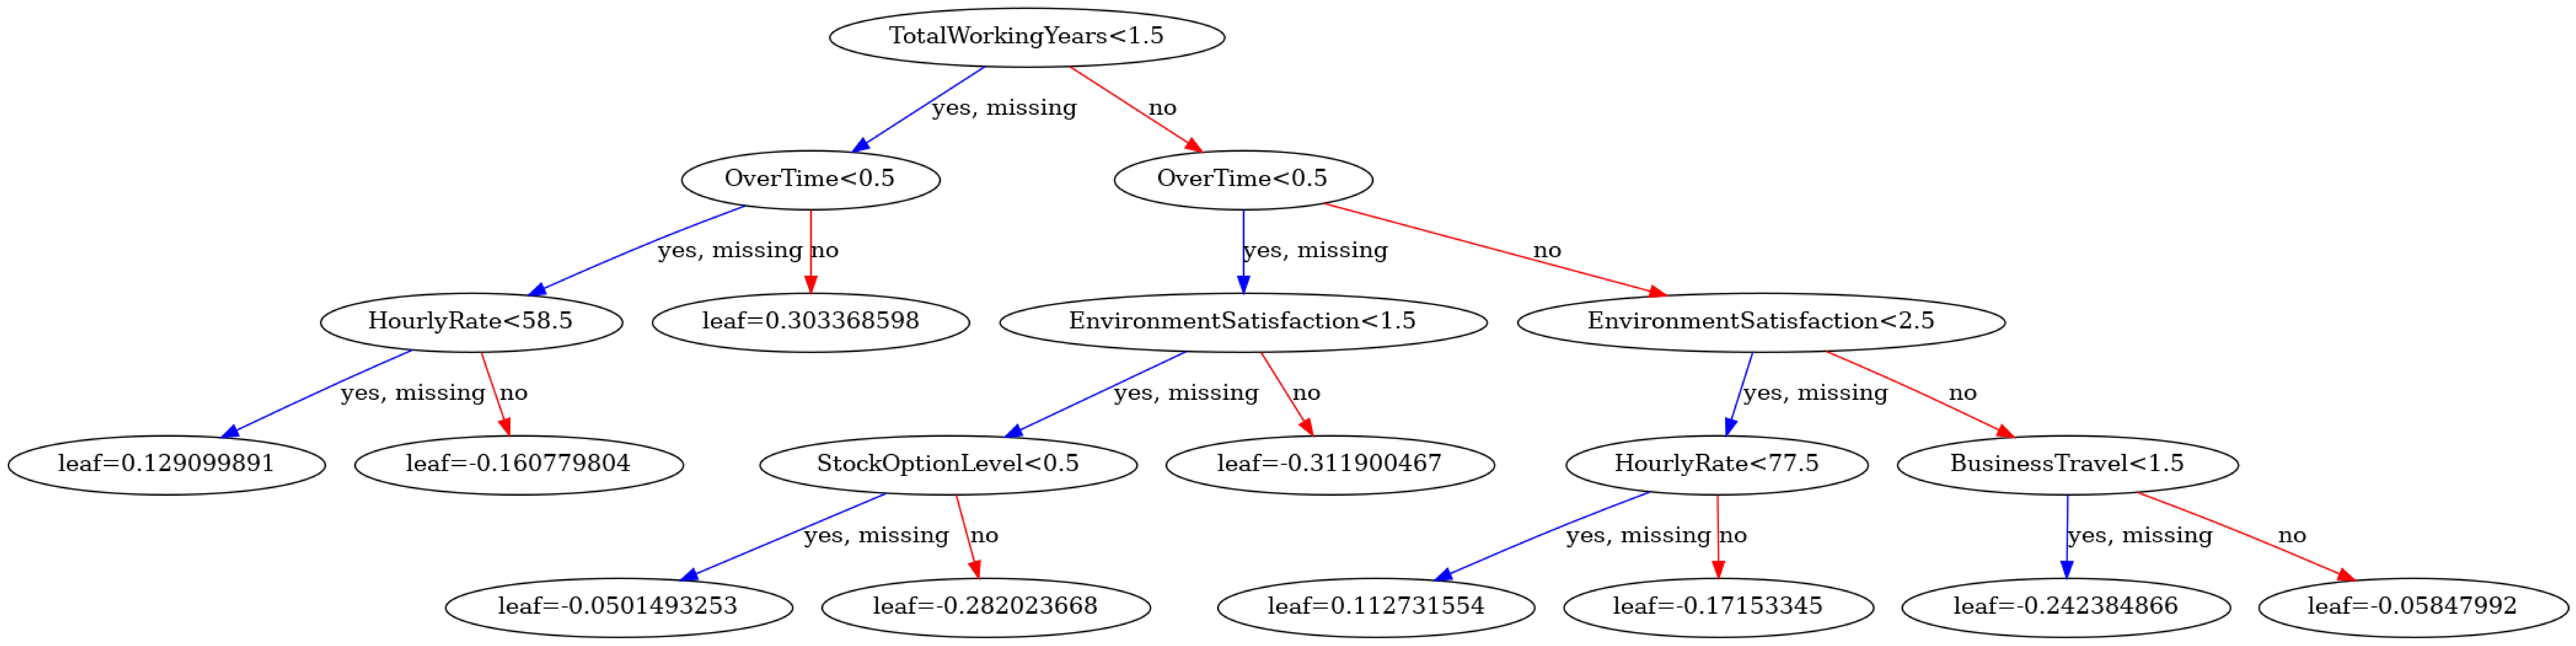

In [78]:
from matplotlib.pylab import rcParams
from matplotlib import pyplot
from xgboost import plot_tree

plot_tree(xgb_best, num_trees=2)
fig = pyplot.gcf()
fig.set_size_inches(200, 100)
fig.savefig('tree.png')
# rcParams['figure.figsize'] = 200,200
# plot_tree(best_model, num_trees=1)

## 3.5 MLP Neural Network

In [79]:
# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, DataLoader

In [80]:
class HR_set(Dataset):
    def __init__(self, train_data, train_target=None, test=False):
        self.is_test = test
        self.train_data = torch.tensor(train_data.values,dtype=torch.float32)
        self.train_target = torch.tensor(train_target.values,dtype=torch.float32)

    def __getitem__(self, item):
        if self.is_test:
            single_data = self.train_data[item]
            return torch.torch.Tensor(single_data).float()
        else:
            single_data = self.train_data[item]
            label = self.train_target[item]
        return torch.torch.Tensor(single_data).float(), label

    def __len__(self):
        return len(self.train_data)

In [81]:
# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, DataLoader

class HR_set(Dataset):
    def __init__(self, train_data, train_target=None, test=False):
        self.is_test = test
        self.train_data = torch.tensor(train_data.values,dtype=torch.float32)
        self.train_target = torch.tensor(train_target.values,dtype=torch.float32)

    def __getitem__(self, item):
        if self.is_test:
            single_data = self.train_data[item]
            return torch.torch.Tensor(single_data).float()
        else:
            single_data = self.train_data[item]
            label = self.train_target[item]
        return torch.torch.Tensor(single_data).float(), label

    def __len__(self):
        return len(self.train_data)
    

class Net(nn.Module):
    def __init__(self, input_size, num_classes): #input_size: num of attributes, num_classes: num of labels
        super(Net, self).__init__()
        self.linearmodel = nn.Sequential(
            nn.Linear(input_size, 120),
            nn.Sigmoid(),
            nn.Linear(120, 20),
            nn.Sigmoid(),
            nn.Linear(20, num_classes),
#             nn.Sigmoid()
        )
    def forward(self, x):
        out = self.linearmodel(x)
        # out = self.CNN(x)
        return out

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

train_set = HR_set(X_train_std, y_train)
val_set = HR_set(X_test_std, y_test)
train_loader = DataLoader(train_set, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1024, shuffle=True)

In [84]:
net = Net(47, 2)
criterion = nn.CrossEntropyLoss()
# our optimizer
learning_rate = 0.0001 # 0.0001
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

train_correct = 0
train_total = 0
num_epochs = 4000
for epoch in range(num_epochs):
    for i, (items, classes) in enumerate(train_loader):
#         print(items, classes)
#             put the model in training mode
            net.train()
            # calculate the loss and gradients
            optimizer.zero_grad()
            outputs = net(items)
            # print(outputs,classes)
            loss = criterion(outputs, classes.to(torch.int64))
            loss.backward()
            optimizer.step()

            # record the correct predictions for training data
            train_total += classes.size(0)
            predicted = outputs.argmax(dim=1)
            train_correct += (predicted == classes.data).sum()
            print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f'
                   %(epoch+1, num_epochs, i+1, (len(X_train_std)//100)+1, loss.data.item()))
    net.eval()
    # Record the loss and train accuracy
    train_loss.append(loss.data.item())
    train_accuracy.append((100 * train_correct / train_total))

    test_items = val_loader.dataset.train_data
    test_classes = y_test
    # record the test accuracy
    outputs = net(test_items)
    # outputs
    targets = torch.tensor(test_classes.values)
    loss = criterion(outputs, targets.to(torch.int64))
    test_loss.append(loss.data.item())
    predicted = outputs.argmax(dim=1)
    
    correct = (predicted == torch.tensor(test_classes.values)).sum()
    acc = (correct/test_classes.size)*100
    print(acc)

Epoch 1/4000, Iteration 1/8, Loss: 0.7776
tensor(17.5227)
Epoch 2/4000, Iteration 1/8, Loss: 0.7751
tensor(17.5227)
Epoch 3/4000, Iteration 1/8, Loss: 0.7726
tensor(17.5227)
Epoch 4/4000, Iteration 1/8, Loss: 0.7702
tensor(17.5227)
Epoch 5/4000, Iteration 1/8, Loss: 0.7677
tensor(17.5227)
Epoch 6/4000, Iteration 1/8, Loss: 0.7652
tensor(17.5227)
Epoch 7/4000, Iteration 1/8, Loss: 0.7628
tensor(17.5227)
Epoch 8/4000, Iteration 1/8, Loss: 0.7604
tensor(17.5227)
Epoch 9/4000, Iteration 1/8, Loss: 0.7580
tensor(17.5227)
Epoch 10/4000, Iteration 1/8, Loss: 0.7555
tensor(17.5227)
Epoch 11/4000, Iteration 1/8, Loss: 0.7531
tensor(17.5227)
Epoch 12/4000, Iteration 1/8, Loss: 0.7507
tensor(17.5227)
Epoch 13/4000, Iteration 1/8, Loss: 0.7484
tensor(17.5227)
Epoch 14/4000, Iteration 1/8, Loss: 0.7460
tensor(17.5227)
Epoch 15/4000, Iteration 1/8, Loss: 0.7436
tensor(17.5227)
Epoch 16/4000, Iteration 1/8, Loss: 0.7413
tensor(17.5227)
Epoch 17/4000, Iteration 1/8, Loss: 0.7389
tensor(17.5227)
Epoch 

In [ ]:
# save submission
# result = generate_submission(predicts)
# result.to_csv("/kaggle/working/submission_xgb12.csv",index=False)